# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
    
_____

В данном исследовании представлен процесс предобработки информации с последующим использованием очищенных данных для выполнения поставленных заказчиком заданий. Процесс предобработки информации представлен в виде пошаговых действий по постепенному повышению пригодности данных к использованию. Также произведен исследовательский анализ данных в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
    
____
    
###### Данное исследование разделено на несколько частей.
    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасета
2. Изучение данных, получение общей информации
3. Вывод

Часть 2. Предобработка данных
    
1. Обработка пропусков
2. Замена типа данных
3. Обработка схожих значений
4. Обработка дубликатов
5. Вывод
    
Часть 3. Добавление необходимой информации
    
1. Добавление столбца "цена за квадратный метр"
2. Добавление столбцов "день недели", "месяц" и "год" публикации объявления
3. Добавление столбца "этаж квартиры"
4. Добавление столбцов "соотношение жилой и общей площади" и "отношение площади кухни к общей площади"
5. Вывод
    
Часть 4. Исследовательский анализ данных 
    
1. Изучение параметров площади, цены, числа комнат, высоты потолков
2. Изучение времени продажи квартиры
3. Удаление редких и выбивающихся значений
4. Изучение зависимости цены от различных факторов
5. Исследование населенных пунктов с наибольшим числом объявлений
6. Определение границ центра Санкт-Петербурга
7. Анализ квартир центра Санкт-Петербурга
8. Вывод
    
Часть 5. Общий вывод
1. Общий вывод о проделанной работе

## Часть 1. Изучение общей информации

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'></a>

### Импорт необходимых библиотек для работы с данными, загрузка датасета

Импортируем необходимые библиотеки, загружаем датасет, убираем ограничения на количество столбцов, отключаем предупреждения.

In [152]:
import pandas as pd
import numpy as np
import re
import timeit
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.d
pd.options.display.max_rows = None
import warningsisplay.max_columns = None
warnings.simplefilter('ignore')

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error

In [2]:
raw_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id='Изучение данных, получение общей информации'></a>

### Изучение данных, получение общей информации

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выведем немного описательной статистики.

In [5]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Также выведем несколько случайных строк для того, чтобы поближе посмотреть на датасет.

In [6]:
raw_data.sample(n=10, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,False,False,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,False,False,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,False,False,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,False,False,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,False,False,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.7,2016-12-29T00:00:00,2,3.20,5.0,23.0,2,NaN,False,False,7.5,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.0,2018-11-23T00:00:00,1,2.80,17.0,22.0,4,NaN,False,False,11.0,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.5,2017-11-14T00:00:00,2,NaN,5.0,33.5,3,NaN,False,False,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.0,2017-10-25T00:00:00,1,2.80,9.0,19.0,4,NaN,False,False,11.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0
17095,8,5100000.0,50.2,2018-10-06T00:00:00,2,2.50,3.0,28.0,1,NaN,False,False,5.4,NaN,Пушкин,12671.0,24825.0,1.0,171.0,0.0,NaN,23.0


Иногда в таблицах в конце есть строка "Итого"(или т.п.), нам она не нужна, убедимся в ее отсутствии.

In [7]:
raw_data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='Вывод_1'></a>

### Вывод

##### В ходе первичного осмотра данных были выявлены следующие недостатки и сделаны следующие выводы:

___

1. Возможно стоит заменить тип данных столбцах last_price, floors_total с float64 на int64, ввиду отсутствия дробных значений в этих столбцах.


2. Столбец ceiling_height пустой примерно на 60% возможно потому, что владельцы либо не знали высоту этажа, либо забыли ее указать при подаче объявления. Возможным решением здесь будет заполнение пропущеных значений средним либо медианным значениями, либо оставить их пустыми. Также в этом столбце есть значения 1 и 100, что маловерятно описывает действительность. С этим мы разберемся позже.


3. Немного недостает значений и в столбце floors_total. Т.к. их очень мало, предположительно их просто забыли указать, или дом одноэтажный. Здесь можно будет заполненить пропущеные значения средним либо медианным значениями, либо оставить их пустыми, в любом случае их слишком мало, чтобы влиять на ситуацию. 


4. Отсутствующие значения в столбце living_area объесняются тем, что люди не всегда знают разницу между жилой и общей площадью. Ну вот, например, стоит ли сюда учитывать площать кухни или нет? А санузлы? А кладовые? А при обмерах учитывать площадь до батареи или до стены? Поэтому некоторые люди не указывают эти значения в надежде, что их никто об этом не спросит. Минимальное значение в этом столбце равно 2, маловато,  с этим нам еще предстоит разобраться. Попробуем посчитать среднее значение отношения total_area к living_area и заполнить пропуски в соответствии с этим значением.


5. Отсутствующие значения в столбце kitchen_area объясняются, возможно тем, что в квартирах-студиях, где нет четкого разделения помещений, сложно понять какая площадь у твоей кухни. Минимальное значение в этом столбце равно 1.3, маловато,  с этим нам еще предстоит разобраться. Попробуем посчитать среднее значение отношения total_area к kitchen_area и заполнить пропуски в соответствии с этим значением.


6. Отсутствующие значения в столбце balcony наверняка означают отсутствие балкона в квартире. Заполним ноликами, это мы умеем. Также заменим здесь тип данных с float64 на int64.


7. Отсутствуют значения в столбце locality_name. Пропусков мало, потому, скорее всего их забыли указать. Т.к. данный параметр для нас критичен (стоимость сильно колеблется в зависимоти от того, где расположена недвижимость), и мы не хотим терять эти данные, можно заполнить эти пропуски по принципу "высокая стоимость - город, низкая стоимость - поселок". В крайнем случае эти данные все же придется удалить.


8. Столбцы типа "nearest" и "around3000" заполнены на основе картографических данных, значения по ним имеются только для Санкт-Петербурга и пригорода. Значения указаны в метрах, есть смысл в замене типа данных с float64 на int64, либо переводе в километры.


9. Возможно стоит заменить тип данных в столбце days_exposition с float64 на int64. Отсутствующие значения объесняются здесь тем, что, возможно, данные собраны с нескольких платформ, и не все из них предоставляют данные о "возрасте" объявления.

___


Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены дефекты датасета. Данные нуждаются в предобработке.

## Часть 2. Предобработка данных

<a id='Обработка пропусков'></a>

### Обработка пропусков

Заменим NaN в столбце balcony на нули.

In [8]:
raw_data['balcony'] = raw_data['balcony'].fillna(0)

In [9]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверим гипотезу о том, что пропуски в столбце floors_total связаны с тем, что дом одноэтажный. 

In [10]:
raw_data.query('floors_total == "NaN" and floor == 2').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9979,3,4100000.0,35.0,2016-09-27T00:00:00,1,NaN,NaN,NaN,2,NaN,False,False,NaN,0.0,Санкт-Петербург,43685.0,9234.0,0.0,NaN,0.0,NaN,173.0
20250,5,6060000.0,60.6,2015-10-29T00:00:00,2,2.8,NaN,NaN,2,NaN,False,False,NaN,0.0,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0


Гипотеза не подтвердилась, принимаем решение удалить эти строки.

In [11]:
raw_data.dropna(subset = ['floors_total'], inplace = True)

Проверяем.

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 23613 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

Уберем строки с попущенными значениями в столбе locality_name, т.к. нам принципиально важно знать расположение объекта, и сложно придумать адекватное решение.

In [13]:
raw_data.dropna(subset = ['locality_name'], inplace = True)

Проверяем.

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Выводим гистограмму по столбцу living_area для того, чтобы потом сравнить с гистограммой после добавления значений. Таким образом мы поймем, насколько сильно мы изменили изначальное распределение.

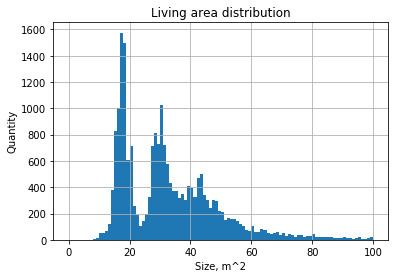

In [15]:
hist = raw_data['living_area'].hist(bins=100, range = (0, 100));
hist.set_title('Living area distribution');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

Посчитаем отношение living_area к total_area для последующего заполнения прорущенных значений столбца living_area.

In [16]:
raw_data['living/total_ratio'] = raw_data['living_area'] / raw_data['total_area']

In [17]:
raw_data['living/total_ratio'].describe()

count    21700.000000
mean         0.564937
std          0.105310
min          0.021583
25%          0.495444
50%          0.568210
75%          0.637913
max          1.000000
Name: living/total_ratio, dtype: float64

Налицо нормальное распределение полученной нами величины.

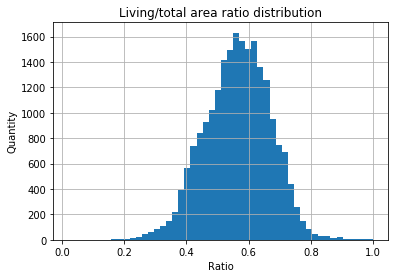

In [18]:
hist = raw_data['living/total_ratio'].hist(bins = 50);
hist.set_title('Living/total area ratio distribution');
hist.set_xlabel('Ratio');
hist.set_ylabel('Quantity');

In [19]:
raw_data['living_area'] = raw_data['living_area'].fillna(raw_data['total_area'] * 0.564937)

In [20]:
raw_data['living_area'].describe()

count    23565.000000
mean        34.561001
std         22.346038
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Диаграмма аналогична предыдущей по этому столбцу, в доказательство того, что с данными мы обошлись аккуратно, распределение не изменилось.

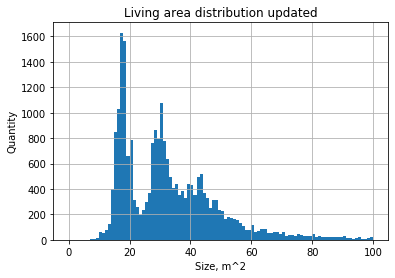

In [21]:
hist = raw_data['living_area'].hist(bins=100, range = (0, 100));
hist.set_title('Living area distribution updated');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

По аналогии заполним недостающие значения в столбце kitchen_area. Выведем гистогарамму для сравнения. Посчитаем отношение kitchen_area к total_area для последующего заполнения прорущенных значений столбца kitchen_area.

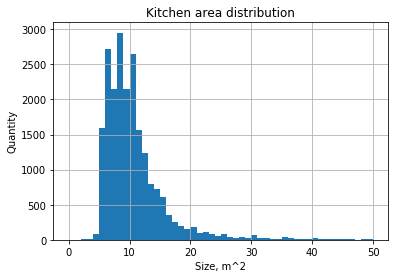

In [22]:
hist = raw_data['kitchen_area'].hist(bins=50, range = (0, 50));
hist.set_title('Kitchen area distribution');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

In [23]:
raw_data['kitchen/total_ratio'] = raw_data['kitchen_area'] / raw_data['total_area']
raw_data['kitchen/total_ratio'].describe()

count    21343.000000
mean         0.187340
std          0.072979
min          0.025381
25%          0.133333
50%          0.172363
75%          0.232432
max          0.787879
Name: kitchen/total_ratio, dtype: float64

Похоже на распределение Пуассона.

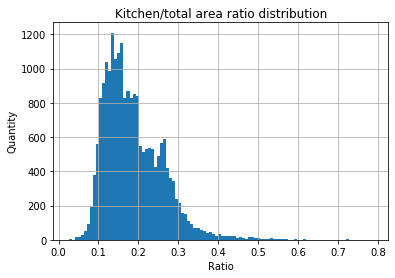

In [24]:
hist = raw_data['kitchen/total_ratio'].hist(bins = 100);
hist.set_title('Kitchen/total area ratio distribution');
hist.set_xlabel('Ratio');
hist.set_ylabel('Quantity');

In [25]:
raw_data['kitchen_area'] = raw_data['kitchen_area'].fillna(raw_data['total_area'] * 0.187340)
raw_data['kitchen_area'].describe()

count    23565.000000
mean        10.565383
std          6.093201
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В целом картина распределения сохранена.

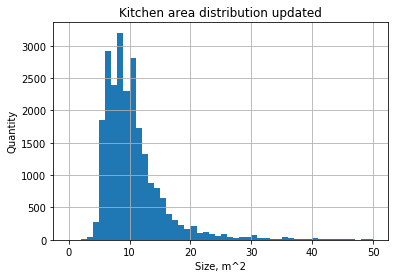

In [26]:
hist = raw_data['kitchen_area'].hist(bins=50, range = (0, 50));
hist.set_title('Kitchen area distribution updated');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

Удалим ненужные столбцы.

In [27]:
raw_data = raw_data.drop(['living/total_ratio', 'kitchen/total_ratio'], 1)

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Теперь разберемся с пропусками в ceiling_height.

In [29]:
raw_data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

На графиках ниже видно, что абсолютное большинство значений попадает в интервал от 2.20 до 3.25, в границах межквартильного размаха.

In [30]:
raw_data_tested = raw_data.query('1.5 < ceiling_height < 3.5')

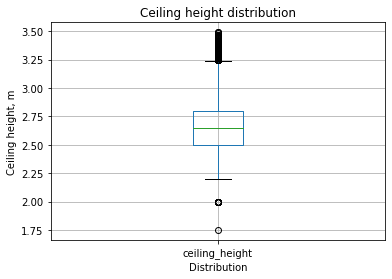

In [31]:
box = raw_data_tested['ceiling_height'].plot.box(grid = True);
box.set_title('Ceiling height distribution');
box.set_xlabel('Distribution');
box.set_ylabel('Ceiling height, m');

Нельзя сказать, что на грфике ниже в районе 2.5 метров выброс, это скорее связано с существующими строительными сериями, в которых многие многоквартирные жилые дома имеют высоту помещений 2.45 - 2.55м.

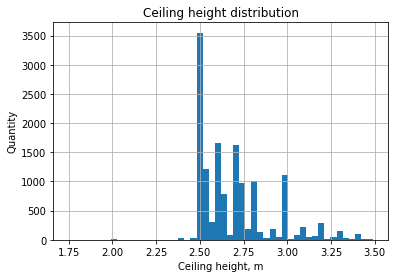

In [32]:
hist = raw_data_tested['ceiling_height'].hist(bins = 50);
hist.set_title('Ceiling height distribution');
hist.set_xlabel('Ceiling height, m');
hist.set_ylabel('Quantity');

Заполним пропуски случайными значениями от 2.35 до 3.10, как наиболее подходящими(получены путем нескольких итераций, за основу брались значения метода describe, до и после исправления).

In [33]:
raw_data['ceiling_height'] = raw_data['ceiling_height'].mask(raw_data['ceiling_height'].isna(), \
                                np.random.uniform(2.35, 3.10, size=raw_data['ceiling_height'].shape))

In [34]:
raw_data_fixed = raw_data.query('1.5 < ceiling_height < 3.5')

Как видно, после добавления пропущенных значений картинка практически не изменилась.

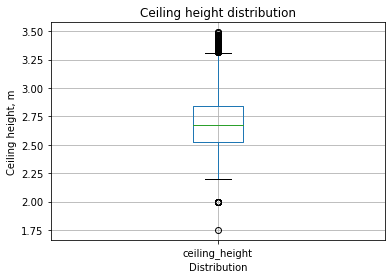

In [35]:
box = raw_data_fixed['ceiling_height'].plot.box(grid = True);
box.set_title('Ceiling height distribution');
box.set_xlabel('Distribution');
box.set_ylabel('Ceiling height, m');

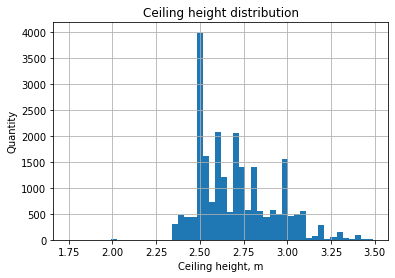

In [36]:
hist = raw_data_fixed['ceiling_height'].hist(bins = 50);
hist.set_title('Ceiling height distribution');
hist.set_xlabel('Ceiling height, m');
hist.set_ylabel('Quantity');

В результате получаем близкие к исходному датасету значения. Решение, конечно, не идеальное, но удалять 40% данных с пропусками тоже не выход. 

In [37]:
raw_data['ceiling_height'].describe()

count    23565.000000
mean         2.753561
std          0.998664
min          1.000000
25%          2.530000
50%          2.688638
75%          2.854940
max        100.000000
Name: ceiling_height, dtype: float64

Разберемся со столбцом is_apartment. Т.к. у нас нет реальной возможности узнать является ли квартира апартаментами или нет, а также зная, что основная часть заполненных клеток имеет значение False, представляется логичным заполнение всех остальных клеток по принципу NaN = False.

Проверяем какие существуют варианты в столбцеis_apartment.

In [38]:
raw_data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Смотрим на количественное соотношение, у False - 2710, у True - 50.

In [39]:
raw_data['is_apartment'].describe()

count      2760
unique        2
top       False
freq       2710
Name: is_apartment, dtype: object

Заменим nan на False.

In [40]:
raw_data['is_apartment'] = raw_data['is_apartment'].astype(str).str.replace('nan','False')

In [41]:
raw_data['is_apartment'].describe()

count     23565
unique        2
top       False
freq      23515
Name: is_apartment, dtype: object

Проверим что получилось.

In [42]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,False,False,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.768412,11.0,18.600000,1,False,False,False,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.503103,5.0,34.300000,4,False,False,False,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.609021,14.0,89.824983,9,False,False,False,29.78706,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,False,False,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id='Замена типа данных'></a>

### Замена типа данных

Заменим тип данных в столбцах.

In [43]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.000000e+00,1.400000e+01,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4.646000e+06,6.790000e+06,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,5.200000e+01,6.970000e+01,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.000000e+00,3.000000e+00,19.0
ceiling_height,23565.0,2.753561e+00,9.986643e-01,1.0,2.53,2.688638e+00,2.854940e+00,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.000000e+00,1.600000e+01,60.0
living_area,23565.0,3.456100e+01,2.234604e+01,2.0,19.00,3.000000e+01,4.210000e+01,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.000000e+00,8.000000e+00,33.0
kitchen_area,23565.0,1.056538e+01,6.093201e+00,1.3,7.00,9.000000e+00,1.200000e+01,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.00,0.000000e+00,1.000000e+00,5.0


Приводим указанные столбцы к типу uint8 т.к. они положительные и небольшие.

In [44]:
raw_data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony']] = \
raw_data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony']].astype('uint8')

Столбец last_price имеет числа побольше, здесь подойдет тип int32.

In [45]:
raw_data['last_price'] = raw_data['last_price'].astype('int32')

Столбцу ceiling_height лучше подходит тип float32.

In [46]:
raw_data['ceiling_height'] = raw_data['ceiling_height'].astype('float32').round(decimals=2)

Округлим получившиеся значения до 2 знаков после запятой.

In [47]:
raw_data[['living_area', 'kitchen_area']] = raw_data[['living_area', 'kitchen_area']].round(2)

Заменим строки на булевые значения.

In [48]:
raw_data['is_apartment'] = raw_data['is_apartment'].replace(to_replace = 'False', value = False)
raw_data['is_apartment'] = raw_data['is_apartment'].replace(to_replace = 'True', value = True)

Проверяем.

In [49]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.77,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.50,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.61,14,89.82,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [50]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null uint8
last_price              23565 non-null int32
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null uint8
ceiling_height          23565 non-null float32
floors_total            23565 non-null uint8
living_area             23565 non-null float64
floor                   23565 non-null uint8
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000      

<a id='Обработка схожих значений'></a>

### Обработка схожих значений

Посмотрим на названия городов, деревень, посёлков. Видим, что некоторые названия повторяются, например 'посёлок Мурино', 'поселок Мурино', 'Мурино'.

In [51]:
raw_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Напишем функцию для устранения этого недостатка. Рассматривались варианты стемминга и лемматизации но, к сожалению, из них не вышло ничего путного. Придумал два варианта.

In [52]:
# функция убирает все значения в списке samples, оставляя только названия населенных пунктов
samples = ['посёлок', 'город', 'городского', 'городской', 'поселок', 'станция', 'деревня', 'типа', 'село', 'при', 'коттеджный', \
          'Большая', 'Большой', 'Большое', 'Пансионат', 'Зелёный', 'станции', 'садоводческое', 'товарищество', 'Новая', 'Новый', \
          'садовое', 'имени', 'Малое', 'Малые', 'Малая', 'Большие', 'железнодорожной', 'некоммерческое']
def locality_name_cleaner_samples(row, column):
    for word in row[column].split():
        if word not in samples:
            return word
        
 

In [53]:
# функция оставляет все слова начинающиеся на большую букву
def locality_name_cleaner(row, column):
    list_names = []
    for word in row[column].split():
        if word[0] == word[0].upper():
            list_names.append(word)
    return ' '.join(list_names)

In [54]:
raw_data['clear_locality_name'] = raw_data.apply(locality_name_cleaner, axis=1, column = 'locality_name')

Проверяем правилиность заполнения, и не упустили ли мы чего по дороге.

In [55]:
raw_data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_locality_name
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.77,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.50,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.61,14,89.82,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.71,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.46,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.70,24,40.45,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.79,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


Проверяем.

In [56]:
raw_data['clear_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [57]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null uint8
last_price              23565 non-null int32
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null uint8
ceiling_height          23565 non-null float32
floors_total            23565 non-null uint8
living_area             23565 non-null float64
floor                   23565 non-null uint8
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000      

<a id='Обработка дубликатов'></a>

### Обработка дубликатов

Проверим наличие дубликатов в датасете.

In [58]:
raw_data.duplicated().sum()

0

Дубликаты не обнаружены.

<a id='Вывод_2'></a>

### Вывод

##### Таким образом в данной части нашего исследовании мы:

___

1. Заполнили пропущенные значения в столбце balcony нулями.


2. Проверили гипотезу о пропущенных значениях столбца floors_total. К сожалению строки пришлось удалить.


3. Удалили строки с пропущенными значениями в столбце locality_name, хорошо что их было немного.


4. Разобрались с пропусками в столбцах living_area и kitchen_area, несильно при этом навредив распределению.


5. Разобрались с пропусками в столбце ceiling_height, навредив распределению чуть сильнее.


6. Как могли решили проблему пропусков в столбце is_apartment.


7. Заменили тип данных в столбцах last_price, floors_total и balcony с float64 на int64, ввиду отсутствия дробных значений в этих столбцах.


8. Поработали над столбцом locality_name, в котором обнаружили похожие значения и сделали все чтобы это исправить. Получилось неплохо.


9. В конце проверили датасет на наличие дубликатов, но сюрпризов не обнаружили.

___

Смело переходим к следующей части нашего исследования.

## Часть 3. Добавление необходимой информации

<a id='Добавление столбца "цена за квадратный метр"'></a>

### Добавление столбца "цена за квадратный метр"

Произведем необходимые вычисления, округлим до двух знаков после запятой.

In [59]:
raw_data['price_per_meter'] = raw_data['last_price'] / raw_data['total_area']
raw_data['price_per_meter'] = raw_data['price_per_meter'].round(decimals=2)

Проверим правильность.

In [60]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_locality_name,price_per_meter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.77,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.50,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.61,14,89.82,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00


<a id='Добавление столбцов "день недели", "месяц" и "год" публикации объявления'></a>

### Добавление столбцов "день недели", "месяц" и "год" публикации объявления

Приведем дату к более читаемому виду.

In [61]:
raw_data['first_day_exposition'] = pd.to_datetime(raw_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [62]:
raw_data['year'] = raw_data['first_day_exposition'].dt.year
raw_data['month'] = raw_data['first_day_exposition'].dt.month
raw_data['day'] = raw_data['first_day_exposition'].dt.day

Проверим что получилось.

In [63]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_locality_name,price_per_meter,year,month,day
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,2019,3,7
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,2018,12,4
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,2015,8,20
3,0,64900000,159.0,2015-07-24,3,2.61,14,89.82,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,2015,7,24
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,2018,6,19


<a id='Добавление столбца "этаж квартиры"'></a>

### Добавление столбца "этаж квартиры"

Напишем функцию для категоризации данных по этажу.

In [64]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floors_total == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'

Применим функцию и посмотрим на результат.

In [65]:
raw_data['floor_category'] = raw_data.apply(floor_category, axis = 1)

In [66]:
raw_data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_locality_name,price_per_meter,year,month,day,floor_category
19017,12,4887000,52.40,2018-03-19,1,3.10,4,24.70,2,True,False,False,11.70,5,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,113.0,Санкт-Петербург,93263.36,2018,3,19,Другой
3186,14,4600000,44.20,2019-01-28,2,2.60,9,27.30,4,False,False,False,6.60,0,Санкт-Петербург,27869.0,11677.0,2.0,314.0,0.0,NaN,26.0,Санкт-Петербург,104072.40,2019,1,28,Другой
7268,1,3500000,36.23,2019-03-26,1,2.88,19,10.08,10,False,False,False,16.30,0,Санкт-Петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,17.0,Санкт-Петербург,96605.02,2019,3,26,Другой
5745,4,4590000,53.77,2017-05-17,1,2.90,25,30.38,3,False,False,False,10.07,2,Санкт-Петербург,40900.0,9592.0,1.0,403.0,0.0,NaN,251.0,Санкт-Петербург,85363.59,2017,5,17,Другой
22281,10,11700000,92.00,2016-03-14,3,2.75,19,56.90,3,False,False,False,17.00,2,Санкт-Петербург,19174.0,7397.0,1.0,552.0,1.0,202.0,638.0,Санкт-Петербург,127173.91,2016,3,14,Другой
12676,12,3800000,47.00,2016-04-29,2,2.98,5,32.00,1,False,False,False,7.30,0,Санкт-Петербург,22794.0,14725.0,0.0,NaN,1.0,544.0,146.0,Санкт-Петербург,80851.06,2016,4,29,Другой
3152,7,3550000,35.00,2015-12-23,1,2.60,24,17.00,3,False,False,False,10.00,0,Санкт-Петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,215.0,Санкт-Петербург,101428.57,2015,12,23,Другой
3267,1,25092624,266.20,2015-12-08,5,3.00,3,155.10,1,False,False,False,11.60,0,Санкт-Петербург,32106.0,5065.0,0.0,NaN,2.0,471.0,660.0,Санкт-Петербург,94262.30,2015,12,8,Другой
23631,17,14799000,104.00,2018-11-18,3,3.10,4,66.00,2,False,False,False,14.00,1,Санкт-Петербург,39047.0,13944.0,0.0,NaN,1.0,553.0,90.0,Санкт-Петербург,142298.08,2018,11,18,Другой
9873,3,2800000,35.00,2017-05-08,1,3.04,14,26.60,2,False,False,False,4.00,0,Санкт-Петербург,13171.0,15762.0,0.0,NaN,0.0,NaN,7.0,Санкт-Петербург,80000.00,2017,5,8,Другой


<a id='Добавление столбцов "соотношение жилой и общей площади" и "отношение площади кухни к общей площади"'></a>

### Добавление столбцов "соотношение жилой и общей площади" и "отношение площади кухни к общей площади"

Произведем необходимые вычисления, округлим до трех знаков после запятой.

In [67]:
raw_data['living/total_ratio'] = raw_data['living_area'] / raw_data['total_area']
raw_data['kitchen/total_ratio'] = raw_data['kitchen_area'] / raw_data['total_area']
raw_data[['living/total_ratio', 'kitchen/total_ratio']] = \
raw_data[['living/total_ratio', 'kitchen/total_ratio']].round(decimals=3)

Проверим правильность.

In [68]:
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_locality_name,price_per_meter,year,month,day,floor_category,living/total_ratio,kitchen/total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,2019,3,7,Другой,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,2.77,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,2018,12,4,Другой,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,2015,8,20,Другой,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,2.61,14,89.82,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,2015,7,24,Другой,0.565,0.187
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,2018,6,19,Другой,0.320,0.410


Изменяем порядок столбцов для обеспечения большей репрезентативности.

In [69]:
data = raw_data[[
                'price_per_meter', 'last_price', 'total_area', 'living_area', 'kitchen_area', 'living/total_ratio', \
                'kitchen/total_ratio', 'ceiling_height', 'rooms', 'floor', 'floors_total', 'floor_category', 'balcony', \
                'is_apartment', 'studio', 'open_plan', 'total_images', 'first_day_exposition', 'year', 'month', 'day', \
                'days_exposition', 'locality_name', 'clear_locality_name', 'airports_nearest', 'cityCenters_nearest', \
                'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'
                ]]

<a id='Вывод_3'></a>

### Вывод

##### Таким образом в данной части нашего исследовании мы:

___

1. Добавили несколько важных столбцов.


2. Написали функцию для категоризации данных по этажу.


3. Изменили порядок столбцов.


___


Переходим непосредственно к исследовательскому анализу данных.

## Часть 4. Исследовательский анализ данных

<a id='Изучение параметров площади, цены, числа комнат, высоты потолков'></a>

### Изучение параметров площади, цены, числа комнат, высоты потолков

Для начала просто посмотрим на общие характеристики.

In [70]:
data_general = data[['total_area', 'price_per_meter', 'last_price', 'rooms', 'ceiling_height']]
data_general.describe()

,total_area,price_per_meter,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,2.356500e+04,23565.000000,23565.000000
mean,60.322824,9.940584e+04,6.540058e+06,2.070656,2.753566
std,35.657060,5.038943e+04,1.091093e+07,1.078591,0.998672
min,12.000000,1.118300e+02,1.219000e+04,0.000000,1.000000
25%,40.000000,7.656613e+04,3.400000e+06,1.000000,2.530000
50%,52.000000,9.500000e+04,4.646000e+06,2.000000,2.690000
75%,69.700000,1.142132e+05,6.790000e+06,3.000000,2.850000
max,900.000000,1.907500e+06,7.630000e+08,19.000000,100.000000


Из-за хвостов диаграммы выглядят не репрезентабельно, поэтому сразу их обрезаем, определяя границы. На всех гистограммах видим распределение Пуассона, либо Лапласа. Также выведены графики типа "box" для понимания где находятся границы межквартильных размахов.

In [71]:
def plot_graph(data, y,  kind, grid, title, xlabel, ylabel, bins = None, range = None, rot = None):
    if kind == 'hist':
        plot = data.plot(y = y, kind = kind, bins = bins, grid = grid, range = range, title = title, rot = rot);
    else:
        plot = data.plot(y = y, kind = kind, grid = grid, title = title);
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)

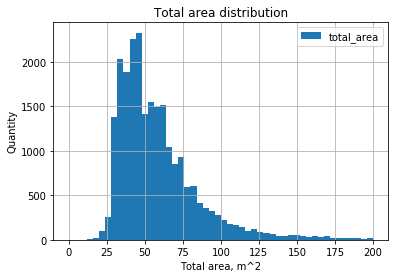

In [72]:
plot_graph(data_general, y = 'total_area', kind = 'hist', bins = 50, grid = True, range = (0, 200), \
           title = 'Total area distribution', xlabel = 'Total area, m^2', ylabel = 'Quantity')

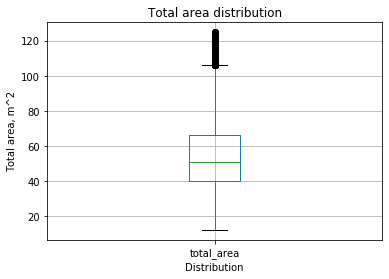

In [73]:
plot_graph(data_general.query('0 < total_area < 125'), y = 'total_area', kind = 'box', grid = True,  \
           title = 'Total area distribution', xlabel = 'Distribution', ylabel = 'Total area, m^2')

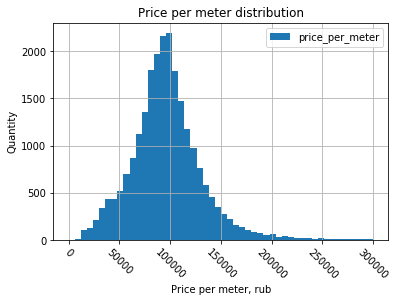

In [74]:
plot_graph(data_general, y = 'price_per_meter', kind = 'hist', bins = 50, grid = True, rot = 315, range = (0, 300000), \
          title = 'Price per meter distribution', xlabel = 'Price per meter, rub', ylabel = 'Quantity')

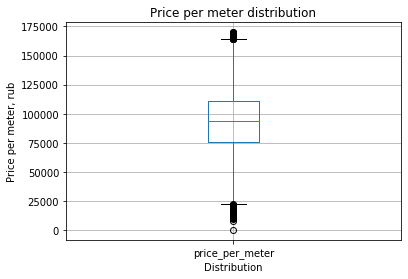

In [75]:
plot_graph(data_general.query('0 < price_per_meter < 170000'), y = 'price_per_meter', kind = 'box', grid = True, \
           title = 'Price per meter distribution', xlabel = 'Distribution', ylabel = 'Price per meter, rub')

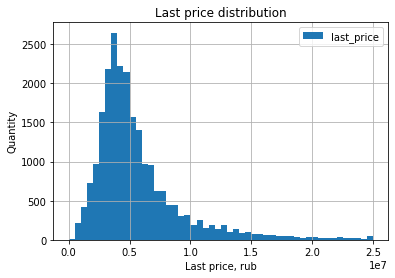

In [76]:
plot_graph(data_general, y = 'last_price', kind = 'hist', bins = 50, grid = True, range = (0, 25000000), \
          title = 'Last price distribution', xlabel = 'Last price, rub', ylabel = 'Quantity')

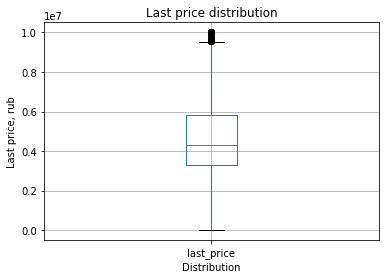

In [77]:
plot_graph(data_general.query('0 < last_price < 10000000'), y = 'last_price', kind = 'box', grid = True, \
           title = 'Last price distribution', xlabel = 'Distribution', ylabel = 'Last price, rub')

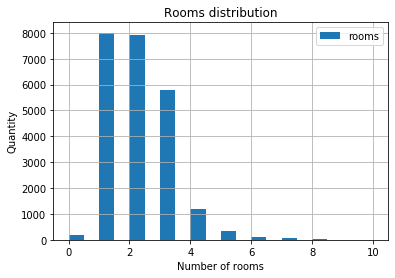

In [78]:
plot_graph(data_general, y = 'rooms', kind = 'hist', bins = 20, grid = True, range = (0, 10), \
          title = 'Rooms distribution', xlabel = 'Number of rooms', ylabel = 'Quantity')

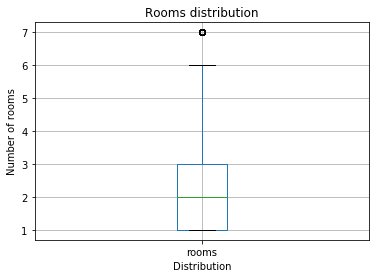

In [79]:
plot_graph(data_general.query('0 < rooms < 8'), y = 'rooms', kind = 'box', grid = True, \
           title = 'Rooms distribution', xlabel = 'Distribution', ylabel = 'Number of rooms')

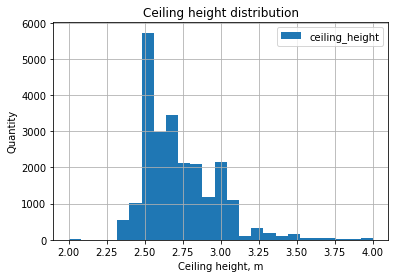

In [80]:
plot_graph(data_general, y = 'ceiling_height', kind = 'hist', bins = 25, grid = True, range = (2.0, 4.0), \
          title = 'Ceiling height distribution', xlabel = 'Ceiling height, m', ylabel = 'Quantity')

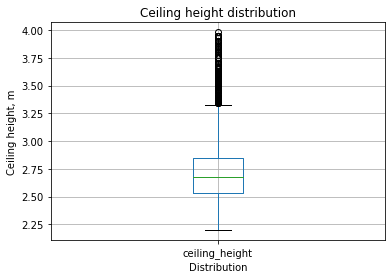

In [81]:
plot_graph(data_general.query('2 < ceiling_height < 4'), y = 'ceiling_height', kind = 'box', grid = True, \
           title = 'Ceiling height distribution', xlabel = 'Distribution', ylabel = 'Ceiling height, m')

<a id='Изучение времени продажи квартиры'></a>

### Изучение времени продажи квартиры

Для изучения времени продажи здания нам понадобится столбец days_exposition.

In [85]:
# data = data.round(2)

In [82]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выявлены выбросы на 45, 60 и 90 дней. 

In [83]:
data['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
1355.0      1
873.0       1
730.0       1
976.0       1
773.0       1
Name: days_exposition, Length: 1139, dtype: int64

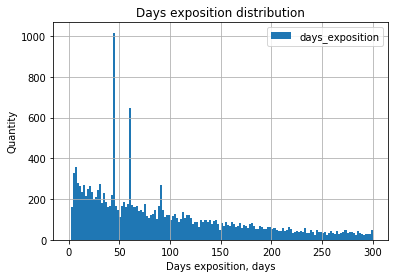

In [84]:
hist = data.plot(y = 'days_exposition', kind = 'hist', bins = 150, grid = True, range = (0, 300), \
                 title = 'Days exposition distribution');
hist.set_xlabel('Days exposition, days');
hist.set_ylabel('Quantity');

In [86]:
days = data.query('days_exposition != 45.0 and days_exposition != 60.0 and days_exposition != 90.0')['days_exposition']
days.describe()

count    18777.000000
mean       191.521809
std        225.735139
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

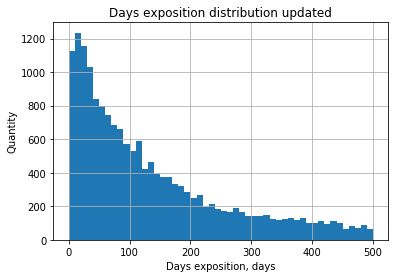

In [87]:
hist = days.plot(kind = 'hist', bins = 50, grid = True, range = (0, 500));
hist.set_title('Days exposition distribution updated');
hist.set_xlabel('Days exposition, days');
hist.set_ylabel('Quantity');

In [88]:
print(f'Медианное значение равно {days.median():.2f} дней.')
print(f'Среднее значение равно {days.mean():.2f} дней.')

Медианное значение равно 110.00 дней.
Среднее значение равно 191.52 дней.


В общем случае, судя по предоставленным данным, продажа квартиры занимает 4 до 6 месяцев, если удалось продать квартиру меньше, чем за месяц, то вам необычайно повезло, а если продажа длится более полутора лет, то стоит задуматься.

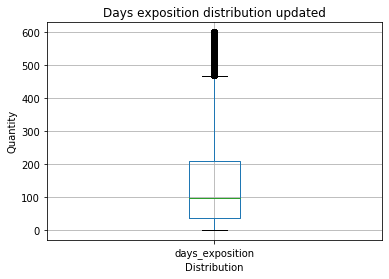

In [89]:
box = data.query('days_exposition != 45.0 and days_exposition != 60.0 and days_exposition != 90.0 and 0 < days_exposition < 600') \
['days_exposition'].plot(y = 'days_exposition', kind = 'box', grid = True);
box.set_title('Days exposition distribution updated');
box.set_xlabel('Distribution');
box.set_ylabel('Quantity');

<a id='Удаление редких и выбивающихся значений'></a>

### Удаление редких и выбивающихся значений

Опираясь на предварительный анализ в пункте 1.4.1, для некоторых столбцов мы уже знаем примерные границы выбивающихся значений.

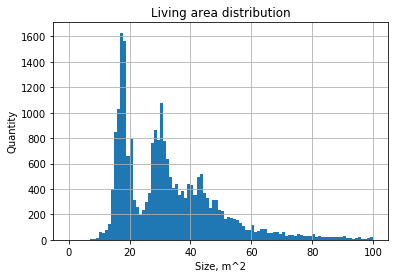

In [90]:
hist = data['living_area'].hist(bins=100, range = (0, 100));
hist.set_title('Living area distribution');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

Проверим, являются ли выбросами пики примерно на 18 и 30 метрах. Гуглим и находим информацию о том, что в среднем однокомнатные квартиры имеют жилую площадь 17-19м^2. Взглянем на гистограмму поближе(снизу). Все сходится. Таким образом видимые нами пики на гистограмме являются следствием логики и устоявшихся строительных норм, где у квартир с бОльшим числом комнат больше жилая площадь.

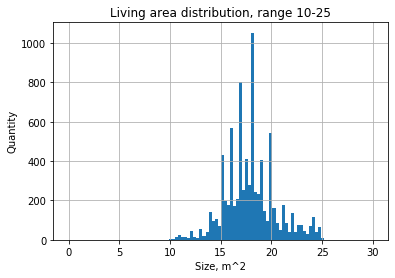

In [91]:
hist = data.query('10 < living_area < 25')['living_area'].hist(bins=100, range = (0, 30));
hist.set_title('Living area distribution, range 10-25');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

Смотрим на межквартильный размах, по нему будем обрезать наш датасет.

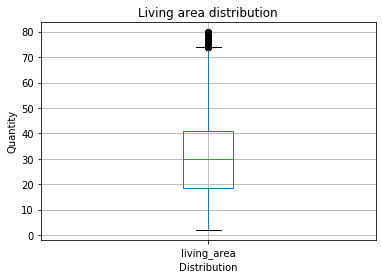

In [92]:
box = data.query('0 < living_area < 80')['living_area'].plot(y = 'living_area', kind = 'box', grid = True);
box.set_title('Living area distribution');
box.set_xlabel('Distribution');
box.set_ylabel('Quantity');

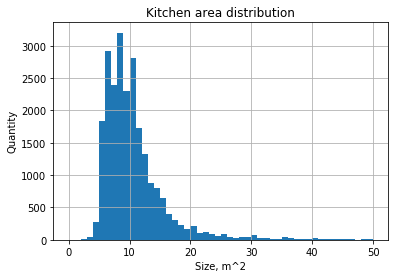

In [93]:
hist = data['kitchen_area'].hist(bins=50, range = (0, 50));
hist.set_title('Kitchen area distribution');
hist.set_xlabel('Size, m^2');
hist.set_ylabel('Quantity');

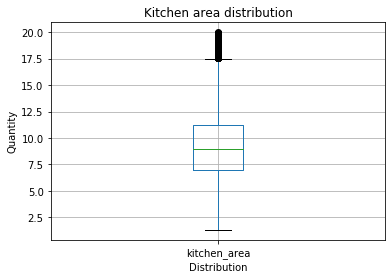

In [94]:
box = data.query('0 < kitchen_area < 20')['kitchen_area'].plot(y = 'kitchen_area', kind = 'box', grid = True);
box.set_title('Kitchen area distribution');
box.set_xlabel('Distribution');
box.set_ylabel('Quantity');

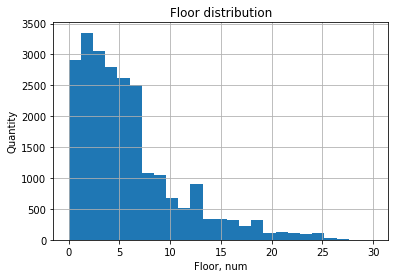

In [95]:
hist = data['floor'].hist(bins=25, range = (0, 30));
hist.set_title('Floor distribution');
hist.set_xlabel('Floor, num');
hist.set_ylabel('Quantity');

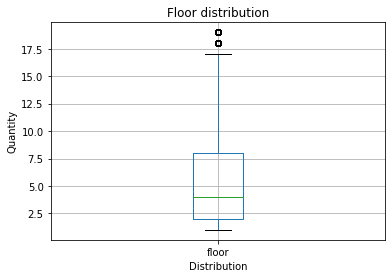

In [96]:
box = data.query('0 < floor < 20')['floor'].plot(y = 'floor', kind = 'box', grid = True);
box.set_title('Floor distribution');
box.set_xlabel('Distribution');
box.set_ylabel('Quantity');

На основании построенных межквартильных размахов оставляем самые распространенные значения.

In [97]:
clean_data = data.query('16 < total_area < 105 and 0 < last_price < 9000000 and 0 < rooms < 6 and 2.2 < ceiling_height < 3.35 \
                        and 2 < living_area < 74 and 2 < kitchen_area < 17.5')

In [98]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 1 to 23698
Data columns (total 30 columns):
price_per_meter         19147 non-null float64
last_price              19147 non-null int32
total_area              19147 non-null float64
living_area             19147 non-null float64
kitchen_area            19147 non-null float64
living/total_ratio      19147 non-null float64
kitchen/total_ratio     19147 non-null float64
ceiling_height          19147 non-null float32
rooms                   19147 non-null uint8
floor                   19147 non-null uint8
floors_total            19147 non-null uint8
floor_category          19147 non-null object
balcony                 19147 non-null uint8
is_apartment            19147 non-null bool
studio                  19147 non-null bool
open_plan               19147 non-null bool
total_images            19147 non-null uint8
first_day_exposition    19147 non-null datetime64[ns]
year                    19147 non-null int64
month          

Таким образом, мы оставили в датесете значения описывающие наиболее общие случаи продаж квартир. 

In [99]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_per_meter,19147.0,8.942435e+04,2.823251e+04,7962.96,73000.00,90702.95,106437.85,312240.00
last_price,19147.0,4.419625e+06,1.731385e+06,430000.00,3205000.00,4200000.00,5500000.00,8999999.00
total_area,19147.0,5.033687e+01,1.536443e+01,17.00,38.10,47.00,60.00,104.60
living_area,19147.0,2.893602e+01,1.138567e+01,3.00,18.00,28.20,36.70,73.00
kitchen_area,19147.0,8.915273e+00,2.670585e+00,2.30,6.90,8.50,10.60,17.46
living/total_ratio,19147.0,5.650718e-01,9.659717e-02,0.07,0.50,0.56,0.63,0.98
kitchen/total_ratio,19147.0,1.870074e-01,6.119314e-02,0.04,0.14,0.18,0.23,0.72
ceiling_height,19147.0,2.679453e+00,1.932244e-01,2.25,2.50,2.64,2.80,3.34
rooms,19147.0,1.869954e+00,8.468357e-01,1.00,1.00,2.00,2.00,5.00
floor,19147.0,5.812503e+00,4.817547e+00,1.00,2.00,4.00,8.00,27.00


<a id='Изучение зависимости цены от различных факторов'></a>

### Изучение зависимости цены от различных факторов

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

В целом можно сказать, что цены за квадратный метр снижаются по мере удаленности от центра, по мере увеличения количества комнат, а также по мере увеличения общей площади квартиры. Это можно косвенно понять, посмотрев на корреляцию(ниже), либо достоверно определить по соответствующим графикам(еще ниже).

In [100]:
clean_data_factors = clean_data[['price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest', 'floor_category']]
clean_data_factors.corr()

,price_per_meter,total_area,rooms,cityCenters_nearest
price_per_meter,1.000000,-0.188396,-0.292508,-0.393800
total_area,-0.188396,1.000000,0.813661,-0.044916
rooms,-0.292508,0.813661,1.000000,-0.027074
cityCenters_nearest,-0.393800,-0.044916,-0.027074,1.000000


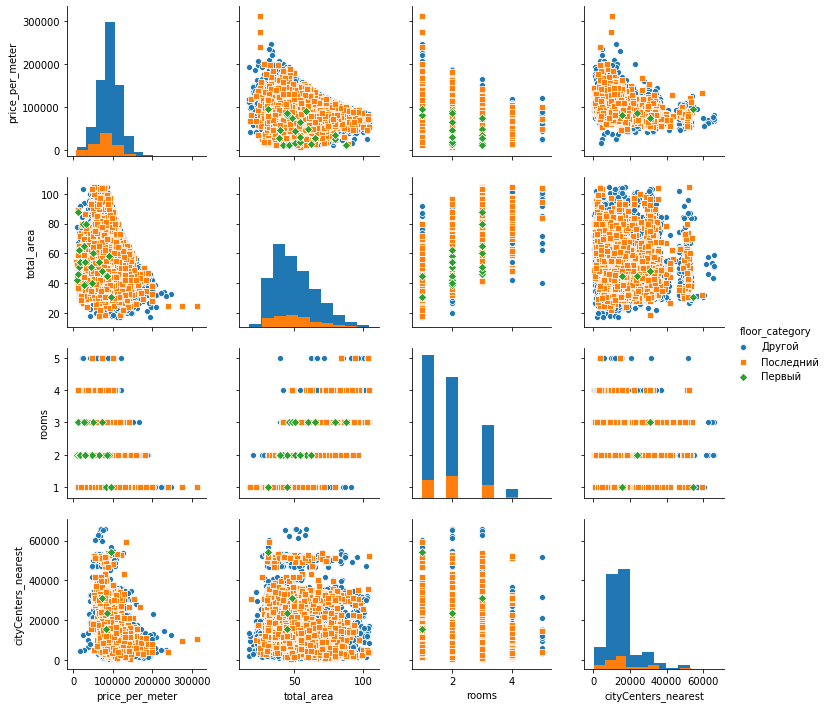

In [101]:
sns.pairplot(clean_data_factors, markers = ["o", "s", "D"],  hue = "floor_category", diag_kind = "hist");

На графике в левом верхнем углу показано общее количество квартир из разных категорий по этажу. По нему можно сделать вывод, что "Других" квартир у нас гораздо больше чем остальных(что вполне логично) и что за "Другие" квартиры дают чуть больше.


На графике зависимости цены за квадратный метр от общей площади(второй сверху в первом столбце) прослеживается отрицательная корреляция факторов, то есть постепенное уменьшение стоимости квадратного метра по мере увеличения общей площади квартиры. На этом же графике можно найти квартиры на первом этаже, находящиеся в самом низком ценовом диапазоне. Также можно отметить несколько небольших дорогих квартир на последнем этаже.


На графике зависимости цены за квадратный метр от количества комнат(второй снизу в первом столбце) также прослеживается отрицательная корреляция факторов, что объясняется прямой зависимостью общей площади от количества комнат.


На графике зависимости цены за квадратный метр от расстояния до центра города(в левом нижнем углу) мы также наблюдаем отрицательную корреляцию, т.е. увеличение стоимости по мере приближения к центру города.

На графиках ниже показаны зависимости цен от категорий этажей. Видно, что меньше всего платят за первые этажи(и меньше всего продают) - около 50000 руб., больше можно получить за квартиру на последнем этаже(около 90000 руб.), еще чуть больше за другие квартиры(до 105000 руб.).

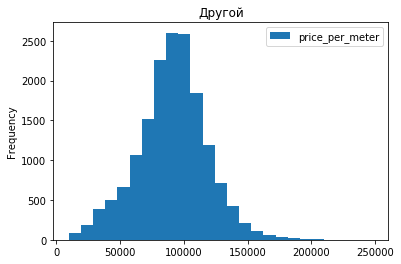

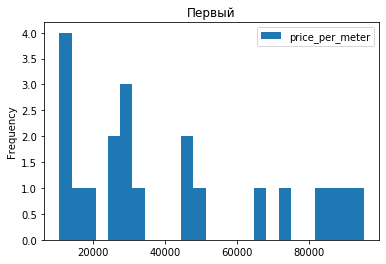

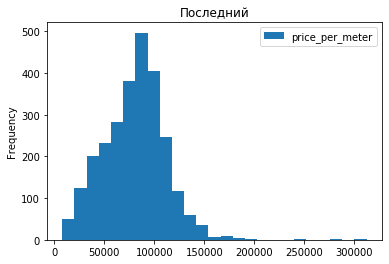

In [102]:
for name, data in clean_data_factors.groupby('floor_category'):
    data.plot(y = 'price_per_meter', title = name, kind = 'hist', bins = 25)

Для дальнейшего анализа необходимо добавить столбцы 'день недели' и 'месяц'.

In [103]:
clean_data['weekday'] = clean_data['first_day_exposition'].dt.weekday_name
clean_data['month_name'] = clean_data['first_day_exposition'].dt.month_name()

Проверим.

In [104]:
clean_data.head()

,price_per_meter,last_price,total_area,living_area,kitchen_area,living/total_ratio,kitchen/total_ratio,ceiling_height,rooms,floor,floors_total,floor_category,balcony,is_apartment,studio,open_plan,total_images,first_day_exposition,year,month,day,days_exposition,locality_name,clear_locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,weekday,month_name
1,82920.79,3350000,40.40,18.60,11.00,0.46,0.27,2.63,1,1,11,Другой,2,False,False,False,7,2018-12-04,2018,12,4,81.0,посёлок Шушары,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,Tuesday,December
2,92785.71,5196000,56.00,34.30,8.30,0.61,0.15,2.54,2,4,5,Другой,0,False,False,False,10,2015-08-20,2015,8,20,558.0,Санкт-Петербург,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,Thursday,August
5,95065.79,2890000,30.40,14.40,9.10,0.47,0.30,2.68,1,5,12,Другой,0,False,False,False,10,2018-09-10,2018,9,10,55.0,городской посёлок Янино-1,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,Monday,September
6,99195.71,3700000,37.30,10.60,14.40,0.28,0.39,2.47,1,6,26,Другой,1,False,False,False,6,2017-11-02,2017,11,2,155.0,посёлок Парголово,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,Thursday,November
8,87454.76,2900000,33.16,15.43,8.81,0.46,0.27,2.51,1,26,27,Другой,0,False,False,False,20,2018-05-23,2018,5,23,189.0,посёлок Мурино,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,May


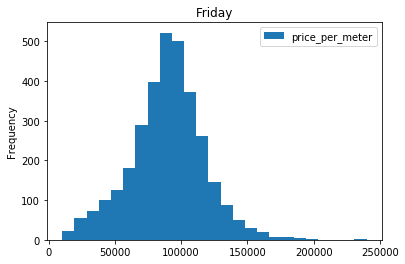

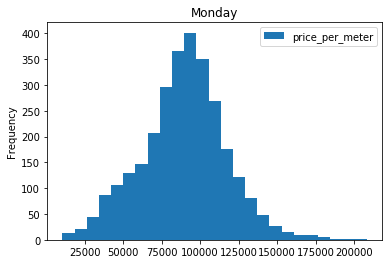

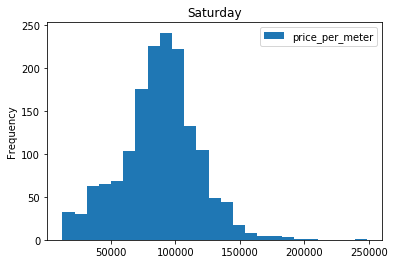

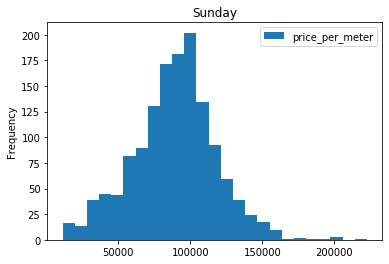

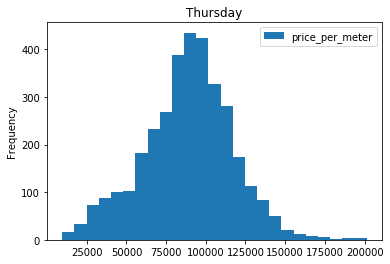

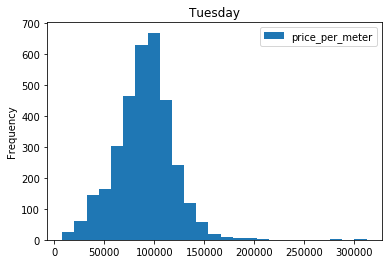

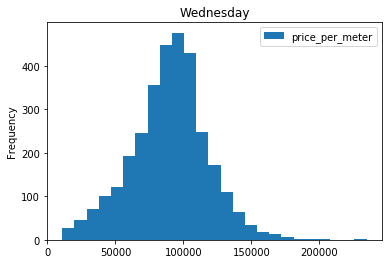

In [105]:
for name, data in clean_data.groupby('weekday'):
    data.plot(y = 'price_per_meter', title = name, kind = 'hist', bins = 25)

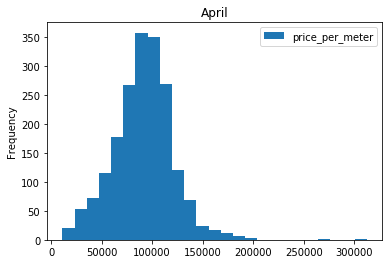

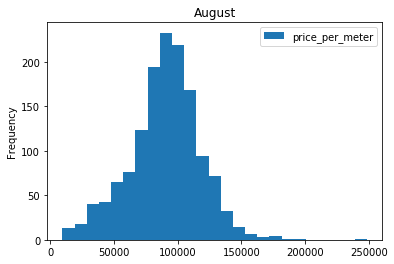

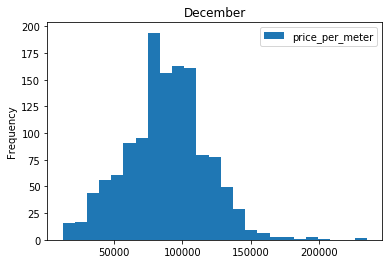

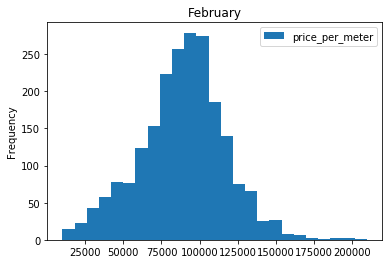

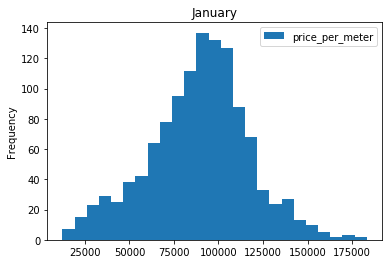

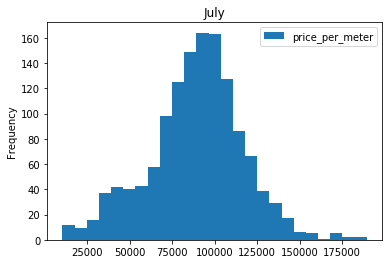

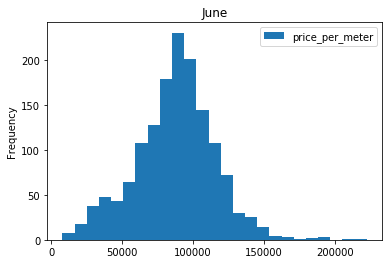

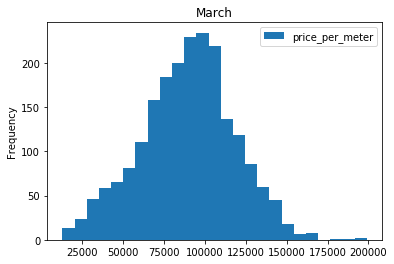

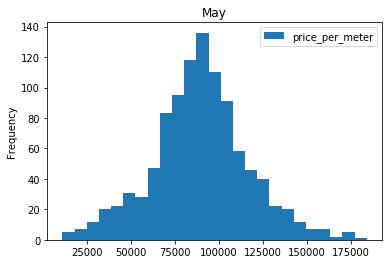

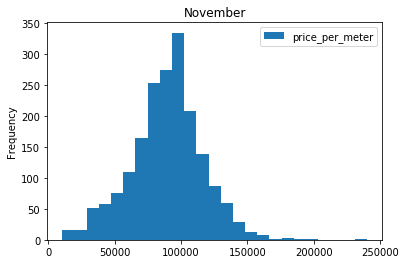

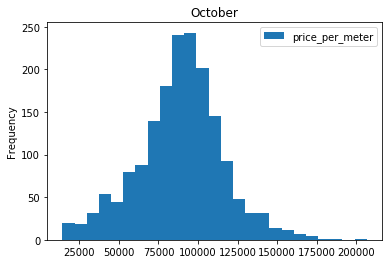

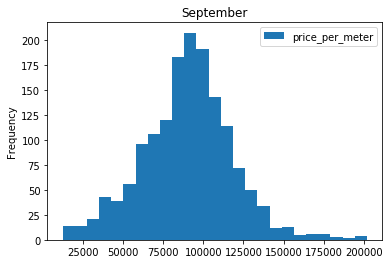

In [106]:
for name, data in clean_data.groupby('month_name'):
    data.plot(y = 'price_per_meter', title = name, kind = 'hist', bins = 25)

Всего объявлений в 2014 году: 70
Всего объявлений в 2015 году: 857
Всего объявлений в 2016 году: 2227
Всего объявлений в 2017 году: 6627
Всего объявлений в 2018 году: 7041
Всего объявлений в 2019 году: 2325


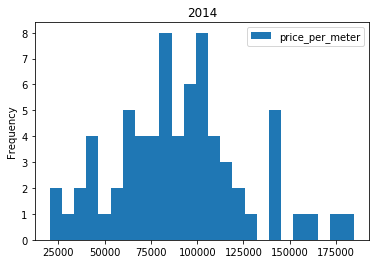

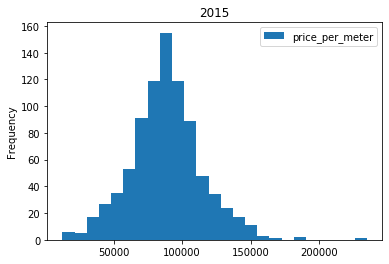

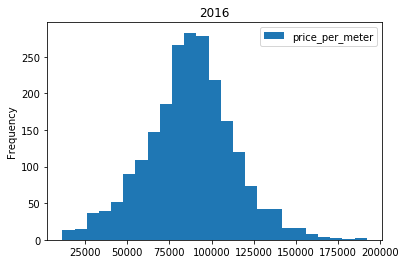

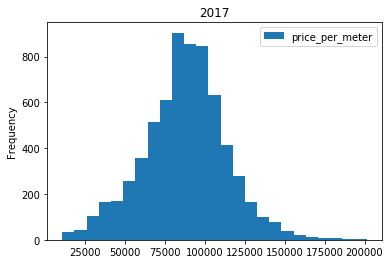

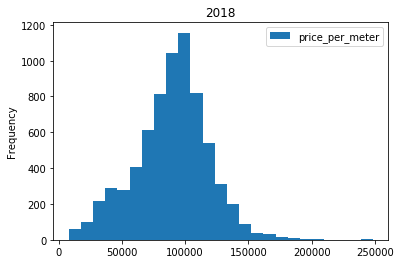

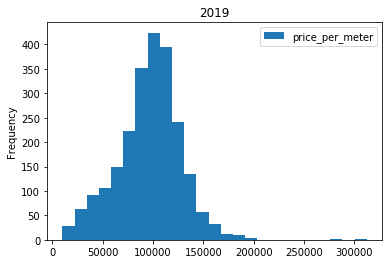

In [107]:
for name, data in clean_data.groupby('year'):
    data.plot(y = 'price_per_meter', title = name, kind = 'hist', bins = 25)
    print(f'Всего объявлений в {name} году: {data.shape[0]}');

- В целом можно сказать, что стоимость квадратного метра не меняется в зависимости от дня подачи объявления, однако выявлено, что больше всего объявлений подают во вторник, за ним идет пятница, потом среда, четверг и понедельник, а замыкают перечень выходные дни.
- Зависимости цены от месяца размещения не обнаружено. В среднем каждый месяц появляется около 200-250 новых объявлений.
- Выявлено повышение стоимости квадратного метра с 2014 до 2019 года, примерно на 20000 рублей, с 80000 до 100000 рублей. При этом наибольшее число объявлений зафиксировано в 2018 году.

<a id='Исследование населенных пунктов с наибольшим числом объявлений'></a>

### Исследование населенных пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [108]:
clean_data.head()

,price_per_meter,last_price,total_area,living_area,kitchen_area,living/total_ratio,kitchen/total_ratio,ceiling_height,rooms,floor,floors_total,floor_category,balcony,is_apartment,studio,open_plan,total_images,first_day_exposition,year,month,day,days_exposition,locality_name,clear_locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,weekday,month_name
1,82920.79,3350000,40.40,18.60,11.00,0.46,0.27,2.63,1,1,11,Другой,2,False,False,False,7,2018-12-04,2018,12,4,81.0,посёлок Шушары,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,Tuesday,December
2,92785.71,5196000,56.00,34.30,8.30,0.61,0.15,2.54,2,4,5,Другой,0,False,False,False,10,2015-08-20,2015,8,20,558.0,Санкт-Петербург,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,Thursday,August
5,95065.79,2890000,30.40,14.40,9.10,0.47,0.30,2.68,1,5,12,Другой,0,False,False,False,10,2018-09-10,2018,9,10,55.0,городской посёлок Янино-1,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,Monday,September
6,99195.71,3700000,37.30,10.60,14.40,0.28,0.39,2.47,1,6,26,Другой,1,False,False,False,6,2017-11-02,2017,11,2,155.0,посёлок Парголово,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,Thursday,November
8,87454.76,2900000,33.16,15.43,8.81,0.46,0.27,2.51,1,26,27,Другой,0,False,False,False,20,2018-05-23,2018,5,23,189.0,посёлок Мурино,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,May


In [109]:
names_big_cities = clean_data['clear_locality_name'].value_counts().sort_values(ascending = False).head(10)
clean_data_first_10 = clean_data.query('clear_locality_name in @names_big_cities.index')

In [110]:
frame_names_big_cities = names_big_cities.to_frame()

In [111]:
clean_data_first_10.head()

,price_per_meter,last_price,total_area,living_area,kitchen_area,living/total_ratio,kitchen/total_ratio,ceiling_height,rooms,floor,floors_total,floor_category,balcony,is_apartment,studio,open_plan,total_images,first_day_exposition,year,month,day,days_exposition,locality_name,clear_locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,weekday,month_name
1,82920.79,3350000,40.40,18.60,11.00,0.46,0.27,2.63,1,1,11,Другой,2,False,False,False,7,2018-12-04,2018,12,4,81.0,посёлок Шушары,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,Tuesday,December
2,92785.71,5196000,56.00,34.30,8.30,0.61,0.15,2.54,2,4,5,Другой,0,False,False,False,10,2015-08-20,2015,8,20,558.0,Санкт-Петербург,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,Thursday,August
6,99195.71,3700000,37.30,10.60,14.40,0.28,0.39,2.47,1,6,26,Другой,1,False,False,False,6,2017-11-02,2017,11,2,155.0,посёлок Парголово,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,Thursday,November
8,87454.76,2900000,33.16,15.43,8.81,0.46,0.27,2.51,1,26,27,Другой,0,False,False,False,20,2018-05-23,2018,5,23,189.0,посёлок Мурино,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,May
9,88524.59,5400000,61.00,43.60,6.50,0.72,0.11,2.50,3,7,9,Другой,2,False,False,False,18,2017-02-26,2017,2,26,289.0,Санкт-Петербург,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,Sunday,February


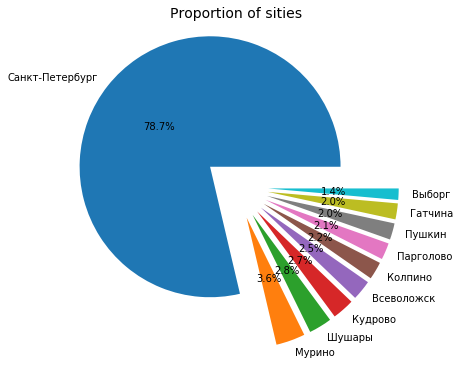

In [112]:
pie, ax = plt.subplots(figsize=[10,6])
labels = names_big_cities.keys()
plt.pie(x=names_big_cities, autopct="%.1f%%", explode=[0.25]*10, labels=labels, pctdistance=0.5)
plt.title('Proportion of sities', fontsize=14);

Как и предполагалось, самая высокая стоимость квадратного метра жилья в Санкт-Петербурге, самая низкая стоимость в Выборге.

In [113]:
pivot_clean_data_first_10 = clean_data_first_10.pivot_table(index = 'clear_locality_name', \
                                                             values = 'price_per_meter', aggfunc = 'mean')                 
pivot_clean_data_first_10.join(frame_names_big_cities).sort_values(by = 'price_per_meter', ascending = False).style.bar()

,price_per_meter,clear_locality_name
clear_locality_name,,
Санкт-Петербург,103288,11738
Пушкин,98942.2,304
Кудрово,94944.5,407
Парголово,90911.2,308
Мурино,85781.7,537
Шушары,78263.4,424
Колпино,75195.2,327
Гатчина,68360.7,295
Всеволожск,66331.2,369


Интересно, изменилась ли бы первая десятка, если бы мы не произвели очистку данных в пункте 1.2.3. Обработка схожих значений. Проверим это.

In [116]:
names_big_cities_raw_data = raw_data['locality_name'].value_counts().sort_values(ascending = False).head(10)
raw_data_first_10 = raw_data.query('locality_name in @names_big_cities_raw_data.index')

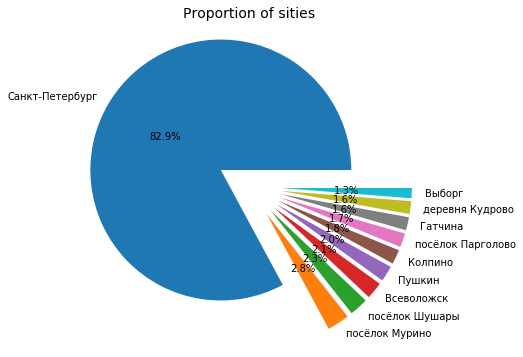

In [118]:
pie, ax = plt.subplots(figsize=[10,6])
labels = names_big_cities_raw_data.keys()
plt.pie(x=names_big_cities_raw_data, autopct="%.1f%%", explode=[0.25]*10, labels=labels, pctdistance=0.5)
plt.title('Proportion of sities', fontsize=14);

Видим как изменилась доля Санкт-Петербурга, также поселки и деревни немного перетасовались, хотя и остались теми же.

<a id='Определение границ центра Санкт-Петербурга'></a>

### Определение границ центра Санкт-Петербурга

Выделим из всего датасета только квартиры в Санкт-Петербурге.

In [119]:
clean_data_piter = clean_data.query('clear_locality_name == "Санкт-Петербург"')

In [120]:
clean_data_piter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 2 to 23690
Data columns (total 32 columns):
price_per_meter         11738 non-null float64
last_price              11738 non-null int32
total_area              11738 non-null float64
living_area             11738 non-null float64
kitchen_area            11738 non-null float64
living/total_ratio      11738 non-null float64
kitchen/total_ratio     11738 non-null float64
ceiling_height          11738 non-null float32
rooms                   11738 non-null uint8
floor                   11738 non-null uint8
floors_total            11738 non-null uint8
floor_category          11738 non-null object
balcony                 11738 non-null uint8
is_apartment            11738 non-null bool
studio                  11738 non-null bool
open_plan               11738 non-null bool
total_images            11738 non-null uint8
first_day_exposition    11738 non-null datetime64[ns]
year                    11738 non-null int64
month          

In [121]:
clean_data_piter.describe().T

,count,mean,std,min,25%,50%,75%,max
price_per_meter,11738.0,1.032883e+05,2.121903e+04,17391.30,88754.10,100000.00,114651.445,312240.00
last_price,11738.0,5.137529e+06,1.506671e+06,1200000.00,3970000.00,4890000.00,6150000.000,8999999.00
total_area,11738.0,5.081142e+01,1.529635e+01,17.00,39.00,47.20,60.200,104.60
living_area,11738.0,2.926423e+01,1.146062e+01,3.00,18.50,28.50,37.200,73.00
kitchen_area,11738.0,8.985777e+00,2.672081e+00,2.89,7.00,8.50,10.600,17.42
living/total_ratio,11738.0,5.659184e-01,9.683223e-02,0.07,0.50,0.56,0.630,0.97
kitchen/total_ratio,11738.0,1.865565e-01,6.042522e-02,0.04,0.14,0.18,0.230,0.59
ceiling_height,11738.0,2.686613e+00,1.966474e-01,2.30,2.50,2.65,2.800,3.34
rooms,11738.0,1.886522e+00,8.593143e-01,1.00,1.00,2.00,3.000,5.00
floor,11738.0,6.219373e+00,4.821462e+00,1.00,3.00,5.00,9.000,26.00


Добавим столбец с округленным расстоянием до центра города.

In [122]:
clean_data_piter['cityCenters_nearest_km'] = clean_data_piter['cityCenters_nearest'] / 1000
clean_data_piter['cityCenters_nearest_km'] = clean_data_piter['cityCenters_nearest_km'].round(decimals=0)

In [123]:
clean_data_piter.head()

,price_per_meter,last_price,total_area,living_area,kitchen_area,living/total_ratio,kitchen/total_ratio,ceiling_height,rooms,floor,floors_total,floor_category,balcony,is_apartment,studio,open_plan,total_images,first_day_exposition,year,month,day,days_exposition,locality_name,clear_locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,weekday,month_name,cityCenters_nearest_km
2,92785.71,5196000,56.0,34.3,8.3,0.61,0.15,2.54,2,4,5,Другой,0,False,False,False,10,2015-08-20,2015,8,20,558.0,Санкт-Петербург,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,Thursday,August,14.0
9,88524.59,5400000,61.0,43.6,6.5,0.72,0.11,2.50,3,7,9,Другой,2,False,False,False,18,2017-02-26,2017,2,26,289.0,Санкт-Петербург,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,Sunday,February,15.0
10,127525.25,5050000,39.6,20.3,8.5,0.51,0.22,2.67,1,3,12,Другой,0,False,False,False,5,2017-11-16,2017,11,16,137.0,Санкт-Петербург,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,Thursday,November,14.0
15,119230.77,4650000,39.0,20.5,7.6,0.53,0.20,3.06,1,5,14,Другой,1,False,False,False,16,2017-11-18,2017,11,18,19.0,Санкт-Петербург,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,Saturday,November,14.0
16,81707.32,6700000,82.0,55.6,9.0,0.68,0.11,3.05,3,1,5,Другой,0,False,False,False,11,2017-11-23,2017,11,23,397.0,Санкт-Петербург,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,Thursday,November,11.0


Таким образом, будем считать центром Санкт-Петербурга окружность с радиусом в 8 километров, хотя больших скачков и не обнаружено, есть перепад между 8 и 9 километром.

In [124]:
hist = clean_data_piter.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean')
hist.style.bar(color='#5fba7d', align='mid')

,price_per_meter
cityCenters_nearest_km,
0.0,110780
1.0,114044
2.0,113346
3.0,106701
4.0,113739
5.0,119114
6.0,119217
7.0,114011
8.0,111771


Самыми престижными считаются дома в пределах 5 и 6 километра, провал на 3 километре можно объяснить тем, что в этом радиусе, возможно, располагается историческая застройка, малоэтажная, требующая постоянного ремонта и т.д.

<a id='Анализ квартир центра Санкт-Петербурга'></a>

### Анализ квартир центра Санкт-Петербурга

In [125]:
clean_data_piter_centre = clean_data_piter.query('cityCenters_nearest_km <= 8.0')

In [126]:
clean_data_piter_centre.describe().T

,count,mean,std,min,25%,50%,75%,max
price_per_meter,1788.0,1.147711e+05,2.710126e+04,17391.30,9.451810e+04,110150.825,1.311782e+05,240000.04
last_price,1788.0,6.238668e+06,1.539793e+06,1600000.00,5.100000e+06,6300000.000,7.500000e+06,8999000.00
total_area,1788.0,5.660409e+01,1.717907e+01,17.00,4.357500e+01,55.000,6.867500e+01,104.50
living_area,1788.0,3.328538e+01,1.325967e+01,6.00,2.200000e+01,31.750,4.291000e+01,73.00
kitchen_area,1788.0,9.590772e+00,2.913696e+00,3.00,7.400000e+00,9.000,1.150000e+01,17.40
living/total_ratio,1788.0,5.771141e-01,1.031662e-01,0.14,5.200000e-01,0.580,6.500000e-01,0.93
kitchen/total_ratio,1788.0,1.797707e-01,6.361611e-02,0.06,1.300000e-01,0.170,2.100000e-01,0.55
ceiling_height,1788.0,2.811924e+00,2.401496e-01,2.35,2.600000e+00,2.800,3.000000e+00,3.34
rooms,1788.0,2.068233e+00,8.742014e-01,1.00,1.000000e+00,2.000,3.000000e+00,5.00
floor,1788.0,4.191834e+00,3.112083e+00,1.00,2.000000e+00,3.000,5.000000e+00,22.00


In [127]:
clean_data_piter_centre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 70 to 23690
Data columns (total 33 columns):
price_per_meter           1788 non-null float64
last_price                1788 non-null int32
total_area                1788 non-null float64
living_area               1788 non-null float64
kitchen_area              1788 non-null float64
living/total_ratio        1788 non-null float64
kitchen/total_ratio       1788 non-null float64
ceiling_height            1788 non-null float32
rooms                     1788 non-null uint8
floor                     1788 non-null uint8
floors_total              1788 non-null uint8
floor_category            1788 non-null object
balcony                   1788 non-null uint8
is_apartment              1788 non-null bool
studio                    1788 non-null bool
open_plan                 1788 non-null bool
total_images              1788 non-null uint8
first_day_exposition      1788 non-null datetime64[ns]
year                      1788 non-null in

Квартиры в центре в основном небольшие. В среднем около 55-60 м^2.

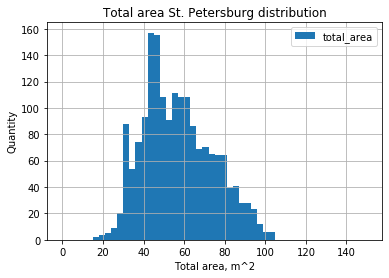

In [128]:
hist = clean_data_piter_centre.plot(y = 'total_area', kind = 'hist', bins = 50, grid = True, range = (0, 150));
hist.set_title('Total area St. Petersburg distribution');
hist.set_xlabel('Total area, m^2');
hist.set_ylabel('Quantity');

Средняя цена квадратного метра равна 115000 рублей.

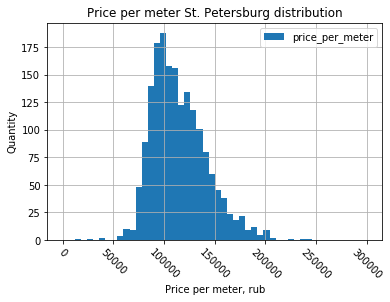

In [129]:
hist = clean_data_piter_centre.plot(y = 'price_per_meter', kind = 'hist', bins = 50, grid = True, rot = 315, range = (0, 300000));
hist.set_title('Price per meter St. Petersburg distribution');
hist.set_xlabel('Price per meter, rub');
hist.set_ylabel('Quantity');

Преобладают двухкомнатные квартиры, хотя много однокомнатных и трехкомнатных.

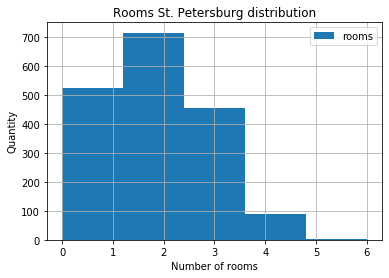

In [130]:
hist = clean_data_piter_centre.plot(y = 'rooms', kind = 'hist', bins = 5, grid = True, range = (0, 6));
hist.set_title('Rooms St. Petersburg distribution');
hist.set_xlabel('Number of rooms');
hist.set_ylabel('Quantity');

Высота потолков в среднем составляет 2.8 метра. Много квартир с трехметровыми потолками.

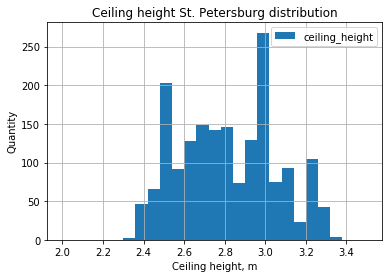

In [131]:
hist = clean_data_piter_centre.plot(y = 'ceiling_height', kind = 'hist', bins = 25, grid = True, range = (2, 3.5));
hist.set_title('Ceiling height St. Petersburg distribution');
hist.set_xlabel('Ceiling height, m');
hist.set_ylabel('Quantity');

In [132]:
clean_data_piter_centre_factors = clean_data_piter_centre[['price_per_meter', 'rooms', 'floor', 'cityCenters_nearest_km', \
                                                           'year']]
clean_data_piter_centre_factors.corr()

,price_per_meter,rooms,floor,cityCenters_nearest_km,year
price_per_meter,1.000000,-0.588304,0.268573,0.009407,0.114524
rooms,-0.588304,1.000000,-0.192197,-0.182544,-0.037330
floor,0.268573,-0.192197,1.000000,0.250885,0.001090
cityCenters_nearest_km,0.009407,-0.182544,0.250885,1.000000,0.089139
year,0.114524,-0.037330,0.001090,0.089139,1.000000


По полученным данным можно сделать вывод о том, что в целом на цену не влияет удаленность от центра и этаж, увеличение количества комнат отрицательно сказывается на цене.


Из интересного можно заметить, что количество этажей в зданиях увеличивается по мере удаления от центра. А еще в зданиях с небольшим количеством этажей большее число комнат. В многоэтажках наоборот, количество комнат меньше.

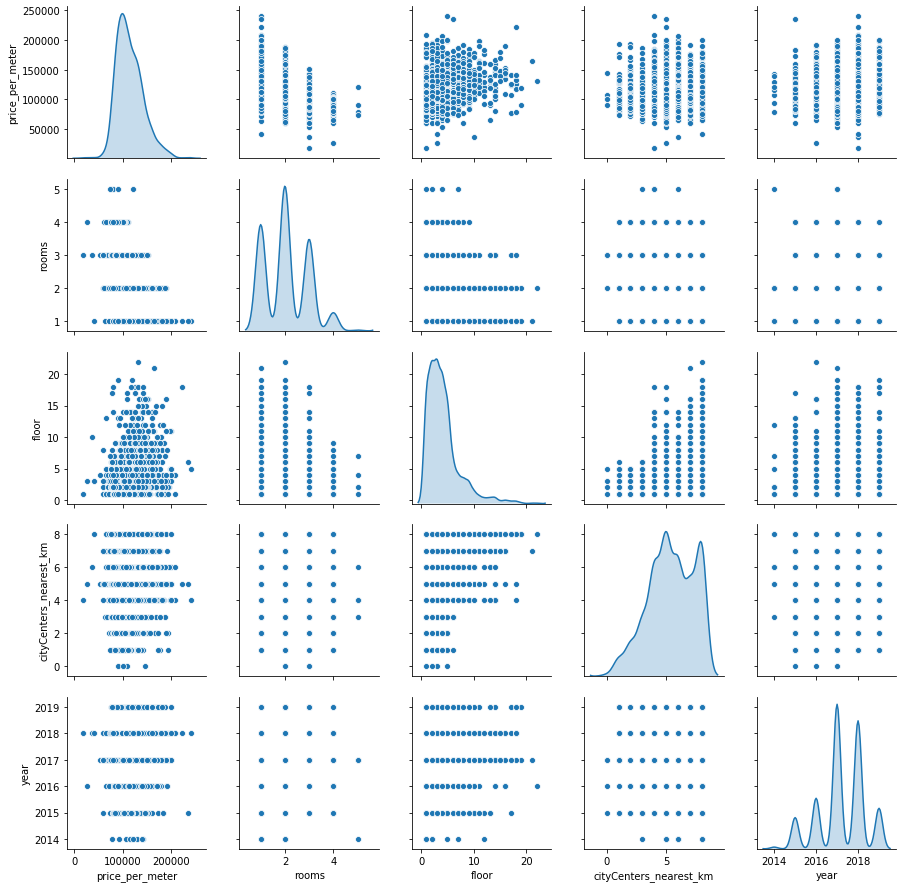

In [133]:
sns.pairplot(clean_data_piter_centre_factors, diag_kind = "kde");

Можно говорить о постепенном увеличении стоимости квадратного метра жилья в центре Санкт-Петербурга.

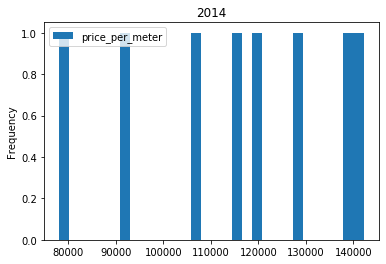

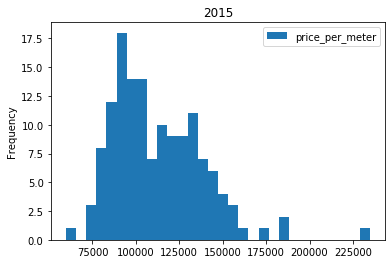

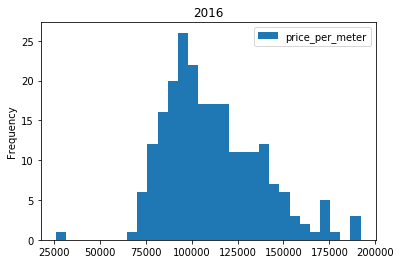

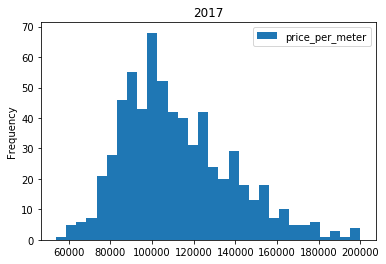

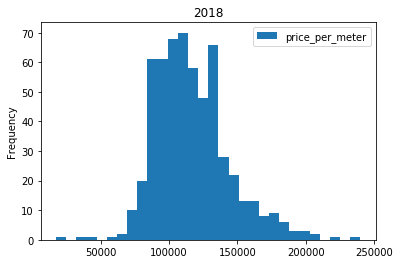

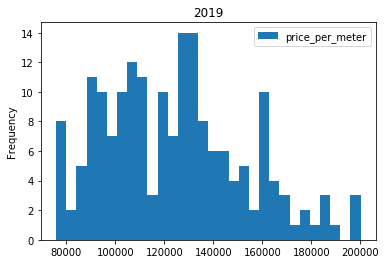

In [134]:
for name, data in clean_data_piter_centre_factors.groupby('year'):
    data.plot(y = 'price_per_meter', title = name, kind = 'hist', bins = 30)

Построим такой же pairplot для всего Санкт-Петербурга и посмотрим есть ли разница.

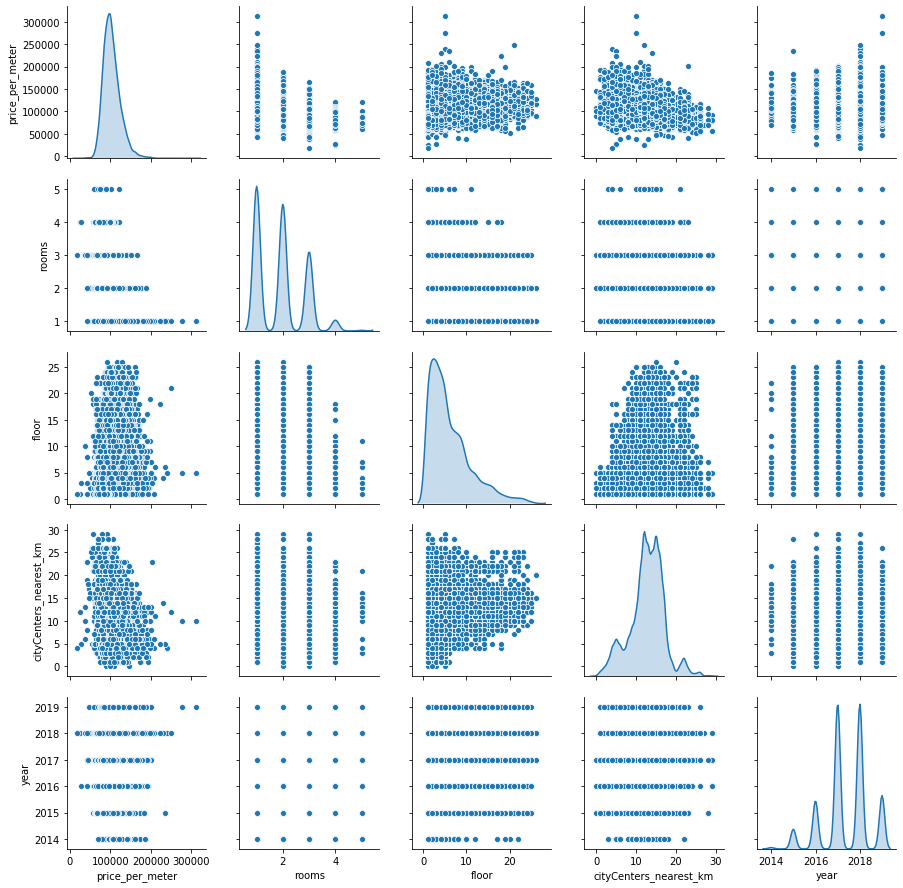

In [135]:
sns.pairplot(clean_data_piter[['price_per_meter', 'rooms', 'floor', 'cityCenters_nearest_km', 'year']], diag_kind = "kde");

В ходе сравнения основных факторов, влияющих на стоимость квартир в Санкт-Петербурге, не было выявлено существенной разницы между влиянием этих факторов на стоимость квадратого метра жилья в центре и на периферии города.

<a id='Вывод_4'></a>

### Вывод

##### Таким образом в заключительной части нашего исследовании мы:

___


1. <a href='#Изучение параметров площади, цены, числа комнат, высоты потолков'>Изучили</a> параметры площади, цены, числа комнат, высоты потолков и построили гистограммы для каждого из этих параметров.


2. <a href='#Изучение времени продажи квартиры'>Изучили</a> время продажи квартир, выяснили что можно называть быстрыми и долгими продажами. В кратце, до месяца - очень быстро, до полугода - нормально, более полутора лет - многовато.


3. <a href='#Удаление редких и выбивающихся значений'>Убрали</a> редкие и выбивающиеся значения. Удалили почти 20% датасета и сильно его очистили.


4. <a href='#Изучение зависимости цены от различных факторов'>Изучили</a> зависомость цены квадратного метра от площади, числа комнат, удалённости от центра, расположения квартиры по этажу, от даты размещения.


5. <a href='#Исследование населенных пунктов с наибольшим числом объявлений'>Посчитали</a> среднюю стоимость квадратного метра населенных пунктов с наибольшим количеством объявлений. В Питере - 103 000, в Выборге - 58 000.


6. <a href='#Определение границ центра Санкт-Петербурга'>Определили</a> границы центра Санкт-Петербурга. Получилось 8 километров.


7. <a href='#Анализ квартир центра Санкт-Петербурга'>Проанализировали</a> квартиры в центре и сравнили влияние некоторых факторов на стоимость квартир в центре и на окраине Санкт-Петербурга.


___

Подробнее о каждом пункте, в том числе применяемые методы и промежуточные выводы, можно найти выше.

## Часть 5. Общий вывод

<a id='Общий вывод о проделанной работе'></a>

### Общий вывод о проделанной работе

Таким образом, была выполнена работа по поиску необходимой информации на основе предоставленного датафрейма.

___

- В первую очередь было произведено импортирование необходимых библиотек, загрузка датафрейма и получение о нем общей информации. Уже на этом этапе в данных обнаружились проблемы, подробнее о которых можно почитать <a href='#Вывод_1'>здесь</a>.


- Для устранения этих дефектов данных была выполнена предобработка данных. В процессе работы были применены необходимые методы и атрибуты, а также написано несколько функций, там где методов и атрибутов не нашлось. Подробнее о каждой опрерации по предобработке данных написано в соответствующем пункте работы. Выводы по проделанной в этом пункте работе можно посмотреть <a href='#Вывод_2'>здесь</a>.


- Далее мы занялись добавлением необходимой информации, <a href='#Вывод_3'>здесь</a> все описано подробнее.


- И, наконец, приступили к самому интересному пункту в нашей работе, где мы выводили много гистограмм, графиков, считали корреляции и делали на основании всего этого выводы. Самая захватывающая и самая объемная часть нашей работы, с выводами которой можно ознакомиться <a href='#Вывод_4'>здесь</a>.

___


## Часть 6. Обучение моделей

Выделим признаки только для Санкт-Петербурга, почистим их и попробуем обучить пару моделей.

In [141]:
clean_data_piter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 2 to 23690
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price_per_meter         11738 non-null  float64       
 1   last_price              11738 non-null  int32         
 2   total_area              11738 non-null  float64       
 3   living_area             11738 non-null  float64       
 4   kitchen_area            11738 non-null  float64       
 5   living/total_ratio      11738 non-null  float64       
 6   kitchen/total_ratio     11738 non-null  float64       
 7   ceiling_height          11738 non-null  float32       
 8   rooms                   11738 non-null  uint8         
 9   floor                   11738 non-null  uint8         
 10  floors_total            11738 non-null  uint8         
 11  floor_category          11738 non-null  object        
 12  balcony                 11738 non-null  uint8 

In [144]:
clean_data_piter = clean_data_piter.drop(['price_per_meter', 'living/total_ratio', 'kitchen/total_ratio', 'floor_category',
                                           'is_apartment', 'first_day_exposition', 'year', 'month', 'day', 'days_exposition',
                                           'locality_name', 'clear_locality_name', 'airports_nearest', 'parks_nearest', 
                                           'ponds_nearest', 'cityCenters_nearest'], axis=1)

In [149]:
clean_data_piter = clean_data_piter.dropna()

In [156]:
clean_data_piter.head()

,last_price,total_area,living_area,kitchen_area,ceiling_height,rooms,floor,floors_total,balcony,studio,open_plan,total_images,cityCenters_nearest,parks_around3000,ponds_around3000,cityCenters_nearest_km
2,5196000,56.0,34.3,8.3,2.45,2,4,5,0,False,False,10,13933.0,1.0,2.0,14.0
9,5400000,61.0,43.6,6.5,2.50,3,7,9,2,False,False,18,15008.0,0.0,0.0,15.0
10,5050000,39.6,20.3,8.5,2.67,1,3,12,0,False,False,5,13878.0,1.0,2.0,14.0
15,4650000,39.0,20.5,7.6,2.95,1,5,14,1,False,False,16,14259.0,1.0,1.0,14.0
16,6700000,82.0,55.6,9.0,3.05,3,1,5,0,False,False,11,10698.0,3.0,0.0,11.0


In [150]:
clean_data_piter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11709 entries, 2 to 23690
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_price              11709 non-null  int32  
 1   total_area              11709 non-null  float64
 2   living_area             11709 non-null  float64
 3   kitchen_area            11709 non-null  float64
 4   ceiling_height          11709 non-null  float32
 5   rooms                   11709 non-null  uint8  
 6   floor                   11709 non-null  uint8  
 7   floors_total            11709 non-null  uint8  
 8   balcony                 11709 non-null  uint8  
 9   studio                  11709 non-null  bool   
 10  open_plan               11709 non-null  bool   
 11  total_images            11709 non-null  uint8  
 12  cityCenters_nearest     11709 non-null  float64
 13  parks_around3000        11709 non-null  float64
 14  ponds_around3000        11709 non-null

Приступим к обучению.

In [159]:
y = clean_data_piter['last_price']
X = clean_data_piter.drop('last_price', axis=1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=228)

In [162]:
print('Признаки обучающей выборки:',X_train.shape,
      'Целевой признак обучающей выборки:',y_train.shape, 
      'Признаки тестовой выборки:', X_test.shape,
      'Целевой признак тестовой выборки:', y_test.shape)

Признаки обучающей выборки: (9367, 15) Целевой признак обучающей выборки: (9367,) Признаки тестовой выборки: (2342, 15) Целевой признак тестовой выборки: (2342,)


In [165]:
numeric = ['total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'rooms', 'floor', 'floors_total','balcony',
           'total_images', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest_km']

In [166]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [168]:
X_train.head()

,total_area,living_area,kitchen_area,ceiling_height,rooms,floor,floors_total,balcony,studio,open_plan,total_images,cityCenters_nearest,parks_around3000,ponds_around3000,cityCenters_nearest_km
22764,-0.011835,-0.773447,0.824184,0.056467,-1.029712,-0.456057,-0.251096,-0.62993,False,False,-1.074063,-1.743136,-0.743124,0.431645,-1.803776
11988,0.151220,0.063789,0.357872,-0.952646,1.287480,-1.077692,-0.412127,-0.62993,False,False,-0.342598,0.133643,-0.743124,-0.794687,0.059990
11494,1.383913,0.761485,1.495674,0.561024,0.128884,0.787215,2.164367,1.55708,False,False,0.023134,0.073721,-0.743124,-0.794687,0.059990
8330,0.470807,0.761485,-0.369575,-0.448090,1.287480,-1.077692,0.070966,-0.62993,False,False,0.388867,-0.095980,2.034546,-0.794687,-0.172981
7172,-0.533609,-0.625186,1.122624,0.561024,-1.029712,0.165579,2.164367,-0.62993,False,False,-0.342598,0.235932,-0.743124,-0.794687,0.292961


In [169]:
X_test.head()

,total_area,living_area,kitchen_area,ceiling_height,rooms,floor,floors_total,balcony,studio,open_plan,total_images,cityCenters_nearest,parks_around3000,ponds_around3000,cityCenters_nearest_km
2746,1.905687,1.563835,2.092554,-1.558114,1.287480,-0.041633,0.070966,1.557080,False,False,1.851797,0.099937,0.645711,0.431645,0.059990
20841,-0.337944,-0.206569,-1.041065,-0.448090,0.128884,-0.248845,-0.412127,-0.629930,False,False,-0.525465,0.511434,-0.743124,0.431645,0.525931
8564,1.970909,1.633605,1.122624,-0.448090,1.287480,0.372791,0.070966,0.463575,False,False,0.388867,0.544438,-0.743124,-0.794687,0.525931
14211,-1.290183,-0.991477,-1.041065,-0.952646,-1.029712,-0.870480,-0.412127,-0.629930,False,False,-0.525465,1.542749,-0.743124,-0.794687,1.457814
17187,-1.877179,-1.331603,-1.817009,1.267404,-1.029712,1.408851,0.715089,-0.629930,False,False,0.206000,-0.213952,0.645711,0.431645,-0.172981


In [170]:
features_to_encode = ['studio', 'open_plan']

In [171]:
encoder = OrdinalEncoder()
encoder.fit(X_train[features_to_encode])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [173]:
X_train[features_to_encode] = encoder.transform(X_train[features_to_encode])
X_test[features_to_encode] = encoder.transform(X_test[features_to_encode])

In [174]:
X_train.head()

,total_area,living_area,kitchen_area,ceiling_height,rooms,floor,floors_total,balcony,studio,open_plan,total_images,cityCenters_nearest,parks_around3000,ponds_around3000,cityCenters_nearest_km
22764,-0.011835,-0.773447,0.824184,0.056467,-1.029712,-0.456057,-0.251096,-0.62993,0.0,0.0,-1.074063,-1.743136,-0.743124,0.431645,-1.803776
11988,0.151220,0.063789,0.357872,-0.952646,1.287480,-1.077692,-0.412127,-0.62993,0.0,0.0,-0.342598,0.133643,-0.743124,-0.794687,0.059990
11494,1.383913,0.761485,1.495674,0.561024,0.128884,0.787215,2.164367,1.55708,0.0,0.0,0.023134,0.073721,-0.743124,-0.794687,0.059990
8330,0.470807,0.761485,-0.369575,-0.448090,1.287480,-1.077692,0.070966,-0.62993,0.0,0.0,0.388867,-0.095980,2.034546,-0.794687,-0.172981
7172,-0.533609,-0.625186,1.122624,0.561024,-1.029712,0.165579,2.164367,-0.62993,0.0,0.0,-0.342598,0.235932,-0.743124,-0.794687,0.292961


In [175]:
X_test.head()

,total_area,living_area,kitchen_area,ceiling_height,rooms,floor,floors_total,balcony,studio,open_plan,total_images,cityCenters_nearest,parks_around3000,ponds_around3000,cityCenters_nearest_km
2746,1.905687,1.563835,2.092554,-1.558114,1.287480,-0.041633,0.070966,1.557080,0.0,0.0,1.851797,0.099937,0.645711,0.431645,0.059990
20841,-0.337944,-0.206569,-1.041065,-0.448090,0.128884,-0.248845,-0.412127,-0.629930,0.0,0.0,-0.525465,0.511434,-0.743124,0.431645,0.525931
8564,1.970909,1.633605,1.122624,-0.448090,1.287480,0.372791,0.070966,0.463575,0.0,0.0,0.388867,0.544438,-0.743124,-0.794687,0.525931
14211,-1.290183,-0.991477,-1.041065,-0.952646,-1.029712,-0.870480,-0.412127,-0.629930,0.0,0.0,-0.525465,1.542749,-0.743124,-0.794687,1.457814
17187,-1.877179,-1.331603,-1.817009,1.267404,-1.029712,1.408851,0.715089,-0.629930,0.0,0.0,0.206000,-0.213952,0.645711,0.431645,-0.172981


In [176]:
def get_rmse(true, predict):
    return np.sqrt(mean_squared_error(true, predict))

Случайный лес

In [177]:
forest_model = RandomForestRegressor()

In [178]:
start = timeit.default_timer()
forest_result = get_rmse(y_test, forest_model.fit(X_train, y_train).predict(X_test))
stop = timeit.default_timer()
forest_time = stop - start
print(f'Time spent: {forest_time:.2f} sec')

Time spent: 6.82 sec


In [179]:
print(f'Средняя ошибка модели - {forest_result:.0f}.')

Средняя ошибка модели - 770396.


Линейная регрессия

In [180]:
linear_model = LinearRegression()

In [181]:
start = timeit.default_timer()
linear_result = get_rmse(y_test, linear_model.fit(X_train, y_train).predict(X_test))
stop = timeit.default_timer()
linear_time = stop - start
print(f'Time spent: {linear_time:.2f} sec')
print(f'Средняя ошибка модели - {linear_result:.0f}.')

Time spent: 0.31 sec
Средняя ошибка модели - 874674.


In [182]:
sgd_model = SGDRegressor()

In [183]:
start = timeit.default_timer()
sgd_result = get_rmse(y_test, sgd_model.fit(X_train, y_train).predict(X_test))
stop = timeit.default_timer()
sgd_time = stop - start
print(f'Time spent: {sgd_time:.2f} sec')
print(f'Средняя ошибка модели - {sgd_result:.0f}.')

Time spent: 0.88 sec
Средняя ошибка модели - 876460.


In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 9, 10, 11],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000, 2000]
}

In [185]:
grid_search = GridSearchCV(estimator = forest_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [186]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 19.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [187]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 2000}

In [194]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.0f} rubles.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [195]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 592157 rubles.
Accuracy = 88.28%.


Таким образом, провели работы по подбору и обучению моделей машинного обучения, лучшей оказалась модель случайного леса, после подбора гиперпараметров добились значения целевой метрики меньше 600000, значение точности - выше 88%.